# 📊 Análisis de entropía, gini y ganancia de información
Samuel Pérez Hurtado

Se importan las librerías que se van a usar y se definen las funciones de entropía, gini y medida_informacion que es la selectora de cuál se va a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def entropia(p):
    return -np.sum([pi*np.log2(pi) if pi>0 else 0 for pi in p])

def gini(pr):
    pr=np.array(pr)
    return 1-np.sum(pr**2)

def medida_informacion(x, pr):
    if x == 'gini':
        return gini(pr)
    elif x == 'entropia':
        return entropia(pr)

Se carga el archivo de Excel y se define el header en la fila 3

In [2]:
data = pd.read_excel('https://www.robertohincapie.com/qetuo1357/encuesta_anonima.xlsx', header=2)

# Preparación de los datos

Se renombran las columnas para un mejor análisis

In [3]:
columnas=["ID",
        "Programa",
        "Fecha",
        "Semestre inicio del programa",
        "Graduado Programa",
        "Promedio Academ Semestre",
        "Estado Académico",
        "Ubicación Semestral Programa",
        "Cod. Colegio",
        "Naturaleza Colegio",
        "Categoría Colegio",
        "Edad",
        "# Créditos aprobados en el semestre",
        "# Créditos reprobados",
        "# Cred. Cancelados Académicos",
        "Género",
        "Doble Programa",
        "Pago matrícula con terceros",
        "Apoyo institucional matrícula",
        "Ind Programa Previo",
        "Graduado de otro pregrado previamente",
        "# Periodos Reg. Matriculados Programa hasta el semestre",
        "Atraso",
        "Rezago",
        "¿Cuál de las siguientes opciones definen mejor la razón o razones principales por las cuales usted eligió el actual programa de estudios?",
        "¿Conoce el plan de estudios de la carrera que va a iniciar?",
        "Desde su graduación como bachiller usted",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? No era de su interés",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? No cumplió sus expectativas",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Por bajo rendimiento académico",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Presión familiar",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Obligaciones laborales",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Dificultades con la institución educativa",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Dificultades económicas",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? Compromisos personales",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? No Aplica",
        "Si usted ha estudiado y no finalizó ¿Por qué no culminó estos estudios? No Aplica 1",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Incómodo",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Ruidoso",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Tranquilo",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Tenso",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Organizado",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Productivo",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Agradable",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Desordenado",
        "¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? No tiene espacio para estudiar",
        "¿Cuáles de las siguientes situaciones presenta en la actualidad? No cuenta con útiles de estudio (cuaderno, libros, esferos, etc.)",
        "¿Cuáles de las siguientes situaciones presenta en la actualidad? No cuenta con computador y/o acceso a internet para realizar sus trabajos académicos.",
        "¿Cuáles de las siguientes situaciones presenta en la actualidad? Cuenta con los recursos necesarios para estudiar en casa",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Utiliza un lugar limpio y tranquilo para estudiar",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Utiliza técnicas como el subrayado, resúmenes, mapas y otras",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Lee varias veces lo que debe estudiar",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Practica ejercicios para mejorar  su razonamiento y concentración",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Revisa constantemente la calidad de su conocimiento",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Aclara los conceptos que no entiende cuando está estudiando",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente Asume posiciones personales frente a lo que va aprendiendo",
        "Señale cuál(es) de las siguientes estrategias de estudio utiliza normalmente No utiliza estrategias de estudio",
        "¿Durante su educación media presentó alguna de las siguientes situaciones?",
        "¿Cuenta con el tiempo para dedicar a sus responsabilidades académicas (preparar exámenes, realizar trabajos, etc)?",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Memoria",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Concentración y atención",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Organización",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Comprensión",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Motivación hacia el estudio",
        "¿Considera que tiene dificultad con algunos de los siguientes aspectos? Ninguna de las anteriores",
        "¿Con cuál(es) de las siguientes afirmaciones se siente identificado?",
        "El ingreso económico aproximado de su grupo familiar es",
        "¿Cuántas personas dependen de ese ingreso familiar?",
        "¿Cuánto tiempo se demora en llegar al lugar donde debe cumplir con sus obligaciones académicas?",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Alimentación",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Transporte",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Materiales Académicos",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Matrícula",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Vivienda",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Internet",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Computador",
        "¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Tratamientos no POS (Plan Obligatorio de Salud) que requiera en la actualidad",
        "¿Quién paga mayoritariamente sus estudios?",
        "Su vivienda es",
        "¿Cómo se declara respecto a su situación económica al ingresar a la Universidad?",
        "¿Cuál es la ocupación principal de su madre?",
        "¿Cuál es la ocupación principal de su padre?",
        "¿Usted es Madre/Padre soltero(a)?",
        "¿Cuantos hijos tiene que dependan económicamente de usted?",
        "¿Cuáles de las siguientes características se presentan en el sector donde usted vive? Invasión",
        "¿Cuáles de las siguientes características se presentan en el sector donde usted vive? Delincuencia menor e inseguridad (atracos, robos)",
        "¿Cuáles de las siguientes características se presentan en el sector donde usted vive? Violencia severa (pandillas y otros grupos armados)",
        "¿Cuáles de las siguientes características se presentan en el sector donde usted vive? Ninguna de los anteriores",
        "Por favor indique si pertenece a las siguientes poblaciones Desplazados",
        "Por favor indique si pertenece a las siguientes poblaciones Comunidades étnicas",
        "Por favor indique si pertenece a las siguientes poblaciones Victimas del conflicto armado",
        "Por favor indique si pertenece a las siguientes poblaciones Enfermedades terminales",
        "Por favor indique si pertenece a las siguientes poblaciones LGTBI",
        "Por favor indique si pertenece a las siguientes poblaciones Ninguna de las anteriores",
        "¿Al momento de iniciar sus estudios se trasladó de ciudad?",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? Estoy adaptado a la ciudad donde me trasladé",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? No estoy adaptado porque no cuento con mis familiares cercanos y me siento solo",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? No estoy adaptado porque no he conseguido compañeros y verdaderos amigos",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? No estoy adaptado porque no me gusta la nueva ciudad",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? Aún me encuentro en proceso de adaptarme",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? No me he trasladado de ciudad",
        "Si usted se trasladó de ciudad, ¿Cual situación describe mejor su adaptación a esa nueva ciudad? No estoy adaptado porque me ha costado ubicarme en una residencia estudiantil donde este cómodo",
        "Al tomar una decisión familiar, ¿A usted lo tienen en cuenta?",
        "Cuando usted debe tomar decisiones importantes ¿Consulta la opinión de su familia?",
        "¿Su familia respeta sus decisiones personales?",
        "¿Cuál es el nivel de escolaridad de su madre?",
        "¿Cuál es el nivel de escolaridad de su padre?",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Malas relaciones intrafamiliares",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Fallecimiento de algún pariente",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Violencia intrafamiliar",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Abuso o violencia sexual",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Enfermedad crónica de algún pariente",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Separación de los padres",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Alcoholismo o adicción a sustancias",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Desplazamiento forzado",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Dificultades económicas de la familia",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Desempleo de los padres",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Víctimas del conflicto armado",
        "¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Ninguna de las anteriores",
        "Si usted tiene o ha tenido una relación de pareja, considera que se caracteriza principalmente por",
        "Elija aquellas opciones que describan mejor la manera como usted enfrenta las crisis",
        "Cuando está en espacios sociales, ¿cuáles de las siguientes situaciones le ocurre con frecuencia?",
        "¿Cuál de las siguientes características describe mejor la manera en que usted establece y mantiene amistades?",
        "4¿Con cuál de los siguientes enunciados se identifica usted al momento de establecer relaciones sociales?",
        "¿Cuántos hermanos tiene con título en Educación Superior?",
        "Estrato",
        "Posee alguna  necesidad educativa diferenciada como: Coeficiente intelectual superior",
        "Posee alguna  necesidad educativa diferenciada como: Deportista de alto rendimiento",
        "Posee alguna  necesidad educativa diferenciada como: Discapacidad Intelectual",
        "Posee alguna  necesidad educativa diferenciada como: Déficit de atención con Hiperactividad (TDAH)",
        "Posee alguna  necesidad educativa diferenciada como: Hipoacusia o baja audición",
        "Posee alguna  necesidad educativa diferenciada como: Sordera profunda",
        "Posee alguna  necesidad educativa diferenciada como: Baja Visión diagnosticada(Perdida permanente de la vision)",
        "Posee alguna  necesidad educativa diferenciada como: Ceguera",
        "Posee alguna  necesidad educativa diferenciada como: Trastornos del lenguaje",
        "Posee alguna  necesidad educativa diferenciada como: Discapacidad motora o motriz",
        "Posee alguna  necesidad educativa diferenciada como: Autismo",
        "Posee alguna  necesidad educativa diferenciada como: Asperger",
        "Posee alguna  necesidad educativa diferenciada como: Parálisis cerebral",
        "Posee alguna  necesidad educativa diferenciada como: Lesión neuromuscular",
        "#N/D",
        "Posee alguna  necesidad educativa diferenciada como: Ninguna",
        "Posee alguna  necesidad educativa diferenciada como: Otro",
        "Padece alguna de las siguientes enfermedades: Insuficiencia Renal",
        "Padece alguna de las siguientes enfermedades: Artritis- lupus",
        "Padece alguna de las siguientes enfermedades: Diabetes / Hipertensión / Insuficiencia cardíaca",
        "Padece alguna de las siguientes enfermedades: Hemofilia",
        "Padece alguna de las siguientes enfermedades: Cáncer",
        "Padece alguna de las siguientes enfermedades: Epilepsia",
        "Padece alguna de las siguientes enfermedades: Migraña severa  diagnosticada por el médico",
        "Padece alguna de las siguientes enfermedades: Fibromialgia",
        "Padece alguna de las siguientes enfermedades: Síndrome de fatiga crónica diagnosticada por médico",
        "Padece alguna de las siguientes enfermedades: Trastorno de ansiedad / Depresión / Trastorno Bipolar",
        "Padece alguna de las siguientes enfermedades: Otro",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Consumo de alcohol",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Consumo de sustancia psicoactivas",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Trastornos de la alimentación",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Promiscuidad",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Juegos de azar o videojuegos",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Situación de abuso sexual",
        "¿Cuál(es) de las siguientes situaciones se le han presentado y han perjudicado sus condiciones de vida? Explotación laboral y/o sexual",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Ayuda para mejorar el comportamiento y la convivencia escolar",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Apoyos para el aprendizaje",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Ayuda en salud mental u orientación psicológica",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Fisioterapia.",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Terapia de lenguaje, auditivo o fonoaudiología",
        "¿Cuáles de los siguientes apoyos ha necesitado durante su vida? Ninguna de las anteriores",
        "¿Padece alguna enfermedad crónica ó permanente para la que necesite atención especializada?",
        "¿Considera que tiene dificultad con alguna de las siguientes situaciones? Trabajar contenidos matemáticos y numéricos",
        "¿Considera que tiene dificultad con alguna de las siguientes situaciones? Comprender lecturas y producir escritos",
        "¿Considera que tiene dificultad con alguna de las siguientes situaciones? Hablar o expresarse en público",
        "¿Considera que tiene dificultad con alguna de las siguientes situaciones? Ver bien o escuchar bien",
        "¿Considera que tiene dificultad con alguna de las siguientes situaciones? Ninguna de las anteriores",
        "#N/D1",
        "¿Cómo se siente con los métodos de estudio que utiliza usualmente? Muy satisfecho",
        "¿Cómo se siente con los métodos de estudio que utiliza usualmente? Satisfecho",
        "¿Cómo se siente con los métodos de estudio que utiliza usualmente? Poco Satisfecho",
        "¿Cómo se siente con los métodos de estudio que utiliza usualmente? Insatisfecho",
        "Estado civil",
        "Tipo de vinculación al Sistema General de Seguridad Social en Salud:",
        "Puntaje 0-39",
        "Puntaje 40-48",
        "Puntaje 49-56",
        "Puntaje 57-99",
        "Puntaje No Aplica",
        "¿En qué tipo de grupos  ha participado en el último año? Arte",
        "¿En qué tipo de grupos  ha participado en el último año? Actividad Fisica",
        "¿En qué tipo de grupos  ha participado en el último año? Formación personal",
        "¿En qué tipo de grupos  ha participado en el último año? Espiritual",
        "¿En qué tipo de grupos  ha participado en el último año? Sociales",
        "¿En qué tipo de grupos  ha participado en el último año? Proyección comunitaria",
        "¿En qué tipo de grupos  ha participado en el último año? Emprendimiento",
        "¿En qué tipo de grupos  ha participado en el último año? Ninguno",
        "¿En qué tipo de grupos  ha participado en el último año? Otro",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Ver T.V",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Escuchar música",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Dormir",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Jugar video Juegos",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Deporte",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Compartir con los amigos",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Navegar en internet",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Leer",
        "¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Otro",
        "¿En qué zona vivía antes de trasladarse?",
        "Usted pertenece a alguna de las siguientes etnias",
        "¿Usted trabaja actualmente?",
        "En caso de tener Sisbén, especificar el puntaje: 0-39",
        "En caso de tener Sisbén, especificar el puntaje: 40-48",
        "En caso de tener Sisbén, especificar el puntaje: 49-56",
        "En caso de tener Sisbén, especificar el puntaje: 57-99",
        "En caso de tener Sisbén, especificar el puntaje: No Aplica",
        "DESERTOR"]
data = data.rename(columns=dict(zip(data.columns, columnas)))

Se saca el promedio de la columna Promedio Academ Semestre para imputarla en los valores que aparecen como "-" y se convierte la columna a float

In [4]:
media_promedio = data.loc[data["Promedio Academ Semestre"] != "-", "Promedio Academ Semestre"].astype(float).mean()
data["Promedio Academ Semestre"] = data["Promedio Academ Semestre"].replace("-", media_promedio)
data["Promedio Academ Semestre"] = pd.to_numeric(data["Promedio Academ Semestre"], downcast="float")

Se crean dos dataframes, uno con el groupby por ID y con las funciones de agregación dependiendo de la columna que se desea operar. En algunos casos se saca la media, el último registro, la cantidad de registros, la suma de estos, la moda o la pendiente.
En otro dataframe están el resto de columnas, posteriormente se combinan (merge) y se guardan en un nuevo dataframe.

In [5]:
df1 = data.groupby(['ID']).agg({'Programa':'last','Fecha':'count','Semestre inicio del programa':'last','Graduado Programa':'last',
                         'Promedio Academ Semestre':(lambda x: np.linalg.lstsq(np.vstack([np.arange(len(x)), np.ones(len(x))]).T, x, rcond=None)[0][0]),'Estado Académico':'last','Ubicación Semestral Programa':'last',
                         'Cod. Colegio':'last','Naturaleza Colegio':'last','Categoría Colegio':'last','Edad':'last',
                         '# Créditos aprobados en el semestre':'sum','# Créditos reprobados':'sum','# Cred. Cancelados Académicos':'sum',
                         'Género':'last','Doble Programa':'last','Pago matrícula con terceros':pd.Series.mode,
                         'Apoyo institucional matrícula':pd.Series.mode,'Ind Programa Previo':'last','Graduado de otro pregrado previamente':'last',
                         '# Periodos Reg. Matriculados Programa hasta el semestre':'last','Atraso':'last','Rezago':'last'})
df1["Pago matrícula con terceros"] = df1["Pago matrícula con terceros"].astype(str)
df1["Apoyo institucional matrícula"] = df1["Apoyo institucional matrícula"].astype(str)
df2 = data.iloc[:, np.r_[0, 24:len(data.columns)]]
df2 = df2.groupby(['ID']).agg('last')

data2 = pd.merge(df1, df2, how='left', left_index=True, right_index=True)
data2

,Programa,Fecha,Semestre inicio del programa,Graduado Programa,Promedio Academ Semestre,Estado Académico,Ubicación Semestral Programa,Cod. Colegio,Naturaleza Colegio,Categoría Colegio,...,¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Otro,¿En qué zona vivía antes de trasladarse?,Usted pertenece a alguna de las siguientes etnias,¿Usted trabaja actualmente?,"En caso de tener Sisbén, especificar el puntaje: 0-39","En caso de tener Sisbén, especificar el puntaje: 40-48","En caso de tener Sisbén, especificar el puntaje: 49-56","En caso de tener Sisbén, especificar el puntaje: 57-99","En caso de tener Sisbén, especificar el puntaje: No Aplica",DESERTOR
ID,,,,,,,,,,,,,,,,,,,,,
4998957,Historia-Med,5,1,NO,-0.024000,Estado académico normal,2,24539,PRIVADO,None,...,0,None,360,SI,0,0,0,0,0,1
14181151,Historia-Med,2,2,NO,0.105000,Estado académico normal,2,281,PRIVADO,A+,...,0,None,360,SI,0,0,0,0,0,1
24661513,Enfermería-Med,2,2,NO,0.115390,Estado académico normal,2,1198,PRIVADO,A+,...,0,None,360,SI,0,0,0,0,0,1
26658125,Enfermería-Med,2,1,NO,-0.656162,Estado académico normal,2,82438,PRIVADO,C,...,0,None,360,NO,0,0,0,0,0,1
61782701,Enfermería-Med,1,1,NO,0.000000,Estado académico normal,1,41962,OFICIAL,B,...,1,None,360,SI,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534494783,Ing Sistemas e Informatica-Med,1,1,NO,0.000000,Estado académico normal,1,27987,OFICIAL,B,...,0,None,360,NO,0,0,0,0,0,1
534503421,Diseño Gráfico-Med,1,1,NO,0.000000,Advertencia académica,1,131060,PRIVADO,None,...,0,ZU,360,NO,0,0,0,0,0,1
534505889,Ing Mecánica-Med,1,1,NO,0.000000,Estado académico normal,1,398,PRIVADO,A+,...,0,None,360,NO,0,0,0,0,0,1


# Entropía

Se halla la entropía de la variable de interés (desertor) haciendo uso de la función

In [6]:
desertores=data2['DESERTOR'].value_counts()
n=desertores.values
pr=np.array(n)/np.sum(n)
Ho=medida_informacion('entropia', pr)
print(f"La entropía de la variable DESERTOR es de: {Ho}")

La entropía de la variable DESERTOR es de: 0.21728267217664715


Se halla la entropía condicional (DESERTOR dado cada columna), y teniendo como referencia la entropía de la variable de interés se puede empezar a mirar las ganancias de información y ver cuales son las columnas que más información aporten

In [7]:
for columna in data2.columns:
    H=0
    for i in data2[columna].unique():
        df=data2[data2[columna]==i]
        des=df['DESERTOR'].value_counts()
        n=des.values
        pr=np.array(n)/np.sum(n)
        Hcond=entropia(pr)
        prob=len(df)/len(data)
        H=H+Hcond*prob
    print(f'La entropia condicional de {columna} es:',H)
    print(f'La ganancia de información es: {Ho-H}\n')

La entropia condicional de Programa es: 0.06160527657090589
La ganancia de información es: 0.15567739560574126

La entropia condicional de Fecha es: 0.06702197348757634
La ganancia de información es: 0.15026069868907083

La entropia condicional de Semestre inicio del programa es: 0.07094290071367668
La ganancia de información es: 0.14633977146297047

La entropia condicional de Graduado Programa es: 0.0
La ganancia de información es: 0.21728267217664715

La entropia condicional de Promedio Academ Semestre es: 0.005997726175874967
La ganancia de información es: 0.2112849460007722

La entropia condicional de Estado Académico es: 0.06946416213985519
La ganancia de información es: 0.14781851003679197

La entropia condicional de Ubicación Semestral Programa es: 0.031674533757494835
La ganancia de información es: 0.1856081384191523

La entropia condicional de Cod. Colegio es: 0.031113732642825423
La ganancia de información es: 0.18616893953382174

La entropia condicional de Naturaleza Colegio

# Gini

Se halla el índice Gini de la variable de interés (desertor) haciendo uso de la función

In [8]:
desertores=data2['DESERTOR'].value_counts()
n=desertores.values
pr=np.array(n)/np.sum(n)
Ho=medida_informacion('gini', pr)
print(f"El índice gini de la variable DESERTOR es de: {Ho}")

El índice gini de la variable DESERTOR es de: 0.0669306930558402


Se halla el índice gini condicional (DESERTOR dado cada columna), y teniendo como referencia el índice gini de la variable de interés se puede empezar a mirar las ganancias de información y ver cuales son las columnas que más información aporten

In [9]:
for columna in data2.columns:
    H=0
    for i in data2[columna].unique():
        df=data2[data2[columna]==i]
        des=df['DESERTOR'].value_counts()
        n=des.values
        pr=np.array(n)/np.sum(n)
        Hcond=gini(pr)
        prob=len(df)/len(data)
        H=H+Hcond*prob
    print(f'El gini condicional de {columna} es:',H)
    print(f'La ganancia de información es: {Ho-H}\n')

El gini condicional de Programa es: 0.020449559810889327
La ganancia de información es: 0.04648113324495088

El gini condicional de Fecha es: 0.021553854874640222
La ganancia de información es: 0.04537683818119999

El gini condicional de Semestre inicio del programa es: 0.021870135521870906
La ganancia de información es: 0.0450605575339693

El gini condicional de Graduado Programa es: 0.0
La ganancia de información es: 0.0669306930558402

El gini condicional de Promedio Academ Semestre es: 0.0014340790642755393
La ganancia de información es: 0.06549661399156467

El gini condicional de Estado Académico es: 0.02175599569682242
La ganancia de información es: 0.04517469735901779

El gini condicional de Ubicación Semestral Programa es: 0.013962948629983632
La ganancia de información es: 0.052967744425856576

El gini condicional de Cod. Colegio es: 0.0128893133379652
La ganancia de información es: 0.05404137971787501

El gini condicional de Naturaleza Colegio es: 0.021427144068414422
La gana

# Correlación

Se halla la correlación entre las variables, para esto se deben convertir las variables dicotómicas a booleanas (1 o 0)

In [18]:
data2['Graduado Programa'] = data2['Graduado Programa'].replace({'SI':1,'NO':0})
data2['Doble Programa'] = data2['Doble Programa'].replace({'SI':1,'NO':0})
data2['Pago matrícula con terceros'] = data2['Pago matrícula con terceros'].replace({'SI':1,'NO':0})
data2['Apoyo institucional matrícula'] = data2['Apoyo institucional matrícula'].replace({'SI':1,'NO':0})
data2['Ind Programa Previo'] = data2['Ind Programa Previo'].replace({'SI':1,'NO':0})
data2['Graduado de otro pregrado previamente'] = data2['Graduado de otro pregrado previamente'].replace({'SI':1,'NO':0})
data2['Rezago'] = data2['Rezago'].replace({'SI':1,'NO':0})
data2['¿Usted trabaja actualmente?'] = data2['¿Usted trabaja actualmente?'].replace({'SI':1,'NO':0})

In [19]:
matriz_correlación = data2.corr(numeric_only=True)
matriz_correlación

,Fecha,Semestre inicio del programa,Graduado Programa,Promedio Academ Semestre,Ubicación Semestral Programa,Edad,# Créditos aprobados en el semestre,# Créditos reprobados,# Cred. Cancelados Académicos,Doble Programa,...,¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Leer,¿Qué tipo de actividad realiza con mayor frecuencia en su tiempo libre? Otro,Usted pertenece a alguna de las siguientes etnias,¿Usted trabaja actualmente?,"En caso de tener Sisbén, especificar el puntaje: 0-39","En caso de tener Sisbén, especificar el puntaje: 40-48","En caso de tener Sisbén, especificar el puntaje: 49-56","En caso de tener Sisbén, especificar el puntaje: 57-99","En caso de tener Sisbén, especificar el puntaje: No Aplica",DESERTOR
Fecha,1.000000,0.145603,0.023981,0.063924,0.546312,0.231272,0.871682,0.127126,0.205016,0.059868,...,0.020987,-0.017740,-0.022421,0.028812,NaN,NaN,NaN,NaN,NaN,-0.023981
Semestre inicio del programa,0.145603,1.000000,-0.018010,0.008988,0.019090,0.177750,0.108935,0.047600,0.052242,-0.015534,...,0.002149,0.016138,-0.009509,0.133951,NaN,NaN,NaN,NaN,NaN,0.018010
Graduado Programa,0.023981,-0.018010,1.000000,0.043633,0.413791,0.178011,0.099803,-0.077878,-0.029691,0.010256,...,-0.000487,-0.010555,0.000387,0.059780,NaN,NaN,NaN,NaN,NaN,-1.000000
Promedio Academ Semestre,0.063924,0.008988,0.043633,1.000000,0.117240,-0.008573,0.117654,-0.158954,-0.110675,0.013222,...,0.003416,-0.024126,0.010270,-0.011215,NaN,NaN,NaN,NaN,NaN,-0.043633
Ubicación Semestral Programa,0.546312,0.019090,0.413791,0.117240,1.000000,0.332279,0.627438,-0.129619,-0.045705,0.077320,...,0.033317,-0.031660,0.009258,0.012638,NaN,NaN,NaN,NaN,NaN,-0.413791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"En caso de tener Sisbén, especificar el puntaje: 40-48",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"En caso de tener Sisbén, especificar el puntaje: 49-56",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"En caso de tener Sisbén, especificar el puntaje: 57-99",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"En caso de tener Sisbén, especificar el puntaje: No Aplica",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


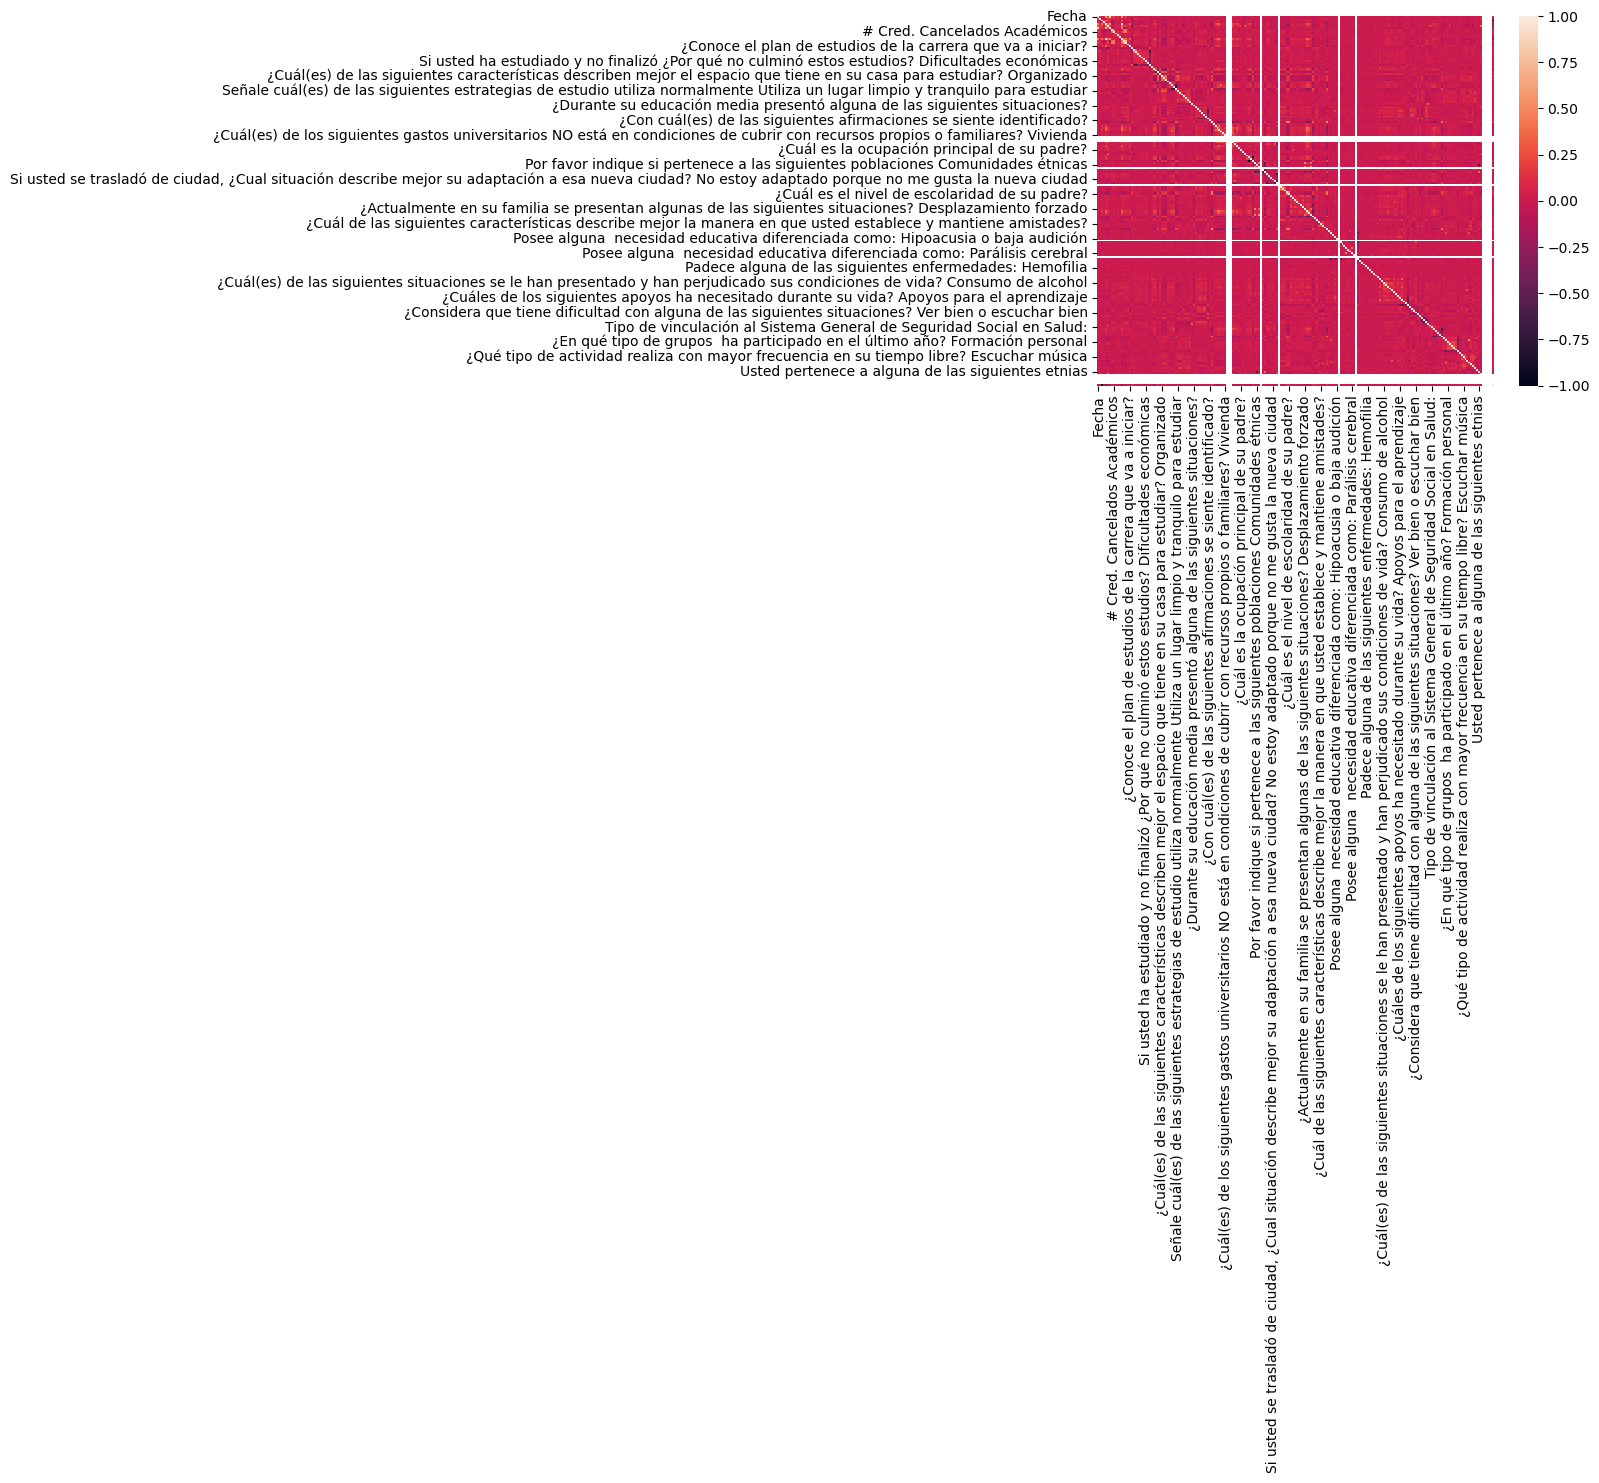

In [20]:
sns.heatmap(matriz_correlación)
plt.show()

Sin embargo, para este análisis sólo nos interesa la correlación de las variables respecto a DESERTOR, es por esto que se muestran sólo estos valores

In [25]:
correlacion_desertor = data2.corr(numeric_only=True)['DESERTOR'].sort_values()

for variable, correlacion in correlacion_desertor.items():
    print(f"{variable}: {correlacion}")

Graduado Programa: -1.0
Ubicación Semestral Programa: -0.4137912633610147
# Periodos Reg. Matriculados Programa hasta el semestre: -0.36346114982329913
Edad: -0.17801133278892226
¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Alimentación: -0.16063625182485766
¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? Transporte: -0.15555827541432946
¿Actualmente en su familia se presentan algunas de las siguientes situaciones? Dificultades económicas de la familia: -0.14986607711139496
¿Quién paga mayoritariamente sus estudios?: -0.12857991870539467
¿Conoce el plan de estudios de la carrera que va a iniciar?: -0.12120532324915863
¿Cuánto tiempo se demora en llegar al lugar donde debe cumplir con sus obligaciones académicas?: -0.11824250430133887
¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? Ruidos

# Conclusiones

Para poder realizar el análisis de la entropía, el índice gini y la correlación para ver cuales son las variables que aportan más información respecto a la deserción, se llegó a las siguientes conclusiones:

En la entropía se tiene que el valor para DESERTOR es de 0.2172, que se tomará como referencia para la entropía condicional

* Graduado Programa tiene una ganancia de información de 0.2172, lo que quiere decir que es muy relevante en este dataset
* Promedio Academ Semestr tiene una ganancia de información de 0.2112, también es muy relevante
* Ubicación Semestral Programa tiene una ganancia de información de 0.1856, también es muy relevante
* Cod. Colegio tiene una ganancia de información de 0.1861, también es muy relevante
* Periodos Reg. Matriculados Programa tiene una ganancia de información de 0.1769, también es muy relevante

En el índice gini se tiene que el valor para DESERTOR es de 0.06693, que se tomará como referencia para el gini condicional

* Graduado Programa tiene una ganancia de información de 0.06693, lo que quiere decir que es muy relevante en este dataset
* Promedio Academ Semestr tiene una ganancia de información de 0.06549, también es muy relevante
* Ubicación Semestral Programa tiene una ganancia de información de 0.05296, también es muy relevante
* Cod. Colegio tiene una ganancia de información de 0.05404, también es muy relevante
* Periodos Reg. Matriculados Programa tiene una ganancia de información de 0.05135, también es muy relevante

El resto de variables aunque podrían ser relevantes, no son indispensables como las anteriormente mencionadas.

En el caso de la correlación, se puede observar que con respecto a la variable DESERTOR se tiene lo siguiente:

* Graduado Programa: -1.0
* Ubicación Semestral Programa: -0.4137912633610147

Por lo tanto, estas variables están inversamente relacionadas con la deserción.